# Movie Recommender Systems: A Comprehensive Guide

Welcome to the fascinating world of recommender systems! This notebook will take you through a complete journey of building movie recommendation systems from the ground up. 

## Learning Objectives

By the end of this tutorial, you will be able to:
- Understand the fundamental concepts of recommender systems and their real-world applications
- Distinguish between different types of recommendation approaches (content-based vs collaborative filtering)
- Work with the MovieLens dataset - a gold standard in recommendation research
- Implement and evaluate collaborative filtering models using KNN and SVD
- Generate personalized movie recommendations for existing and new users
- Understand the "cold start" problem and how to address it

## Why Recommender Systems Matter

In today's digital world, we're overwhelmed with choices. Netflix has thousands of movies, Spotify has millions of songs, and Amazon has billions of products. Recommender systems help us navigate this abundance by suggesting items we're likely to enjoy, making our digital experiences more personalized and efficient.

## Understanding Recommender Systems

### What is a Recommender System?

Think of a recommender system as a knowledgeable friend who knows your taste perfectly. When you walk into a bookstore, this friend immediately points out books you'll love based on:
1. What you've enjoyed before
2. What similar people with your taste have liked

That's exactly what a recommender system does, but at scale and with mathematical precision.

### Types of Recommender Systems

There are three main approaches to building recommender systems:

#### 1. Content-Based Filtering
**Main idea**: "If you like an item, you will also like similar items"

This approach recommends items similar to what you've liked before. For movies, it might look at:
- Genre (action, comedy, drama)
- Director or actors
- Movie themes or keywords

**Example**: If you love action movies starring Tom Cruise, the system will recommend other Tom Cruise action films.

#### 2. Collaborative Filtering (Our Focus)
**Main idea**: "People with similar tastes tend to like similar things"

This approach uses the collective behavior of users to make recommendations. It finds patterns in how different users rate items.

**Example**: If you and another user both loved the same 5 movies, and they liked a 6th movie you haven't seen, you'll probably like it too.

#### 3. Hybrid Systems
These combine both approaches for better accuracy and coverage.

### Why Focus on Collaborative Filtering?

Collaborative filtering is the most widely used approach because:
- It doesn't require detailed item descriptions
- It can discover surprising connections between items
- It leverages the "wisdom of crowds"
- It's the foundation of systems used by Netflix, Amazon, and Spotify

## Key Concepts in Collaborative Filtering

### 1. Memory-Based / Neighborhood-Based Collaborative Filtering
Memory-based collaborative filtering makes recommendations by directly analyzing the user-item interaction matrix. It looks for similarities between users (user-based) or between items (item-based) to predict ratings or suggest items. The main idea is that similar users will like similar items, or that items liked by similar users are likely to be liked by the target user.

- **User-based:** Finds users similar to the target user and recommends items they liked.
- **Item-based:** Finds items similar to those the user already likes and recommends them.

**Visual Example:**
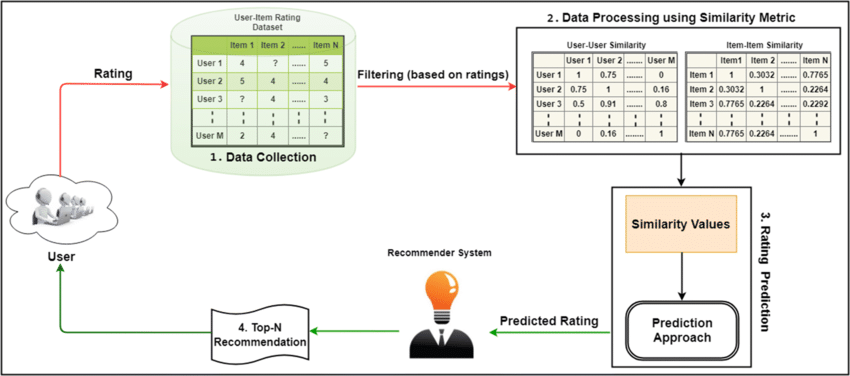

### 2. Similarity Metrics
To find similar users or items, we need a way to measure similarity. Common metrics include:
- **Cosine Similarity:** Measures the cosine of the angle between two vectors (ratings). Values range from -1 (opposite) to 1 (identical).
- **Pearson Correlation:** Measures linear correlation between two users' (or items') ratings, accounting for differences in rating scale.
- **Jaccard Similarity:** Measures the overlap between sets (e.g., items rated by two users), ignoring the actual rating values.

These metrics help identify the "nearest neighbors" for making recommendations.

### 3. Model-Based Collaborative Filtering
Model-based collaborative filtering uses machine learning models to learn patterns from the user-item matrix. Instead of relying on direct similarity, it builds a model (often using matrix factorization) that can predict missing ratings or recommend items efficiently.

- **Advantages:**
  - Handles large, sparse datasets better
  - Can uncover hidden patterns (latent factors)
  - More scalable for production systems

### 4. Matrix Factorization (Brief Overview)
Matrix factorization is a powerful model-based technique. It decomposes the large, sparse user-item matrix into two lower-dimensional matrices:
- **User matrix:** Captures each user's preferences as a vector of latent features
- **Item matrix:** Captures each item's characteristics as a vector of latent features

The dot product of a user and item vector predicts the user's rating for that item. This approach is the foundation of algorithms like SVD (Singular Value Decomposition) and ALS (Alternating Least Squares).

**Visual Example:**
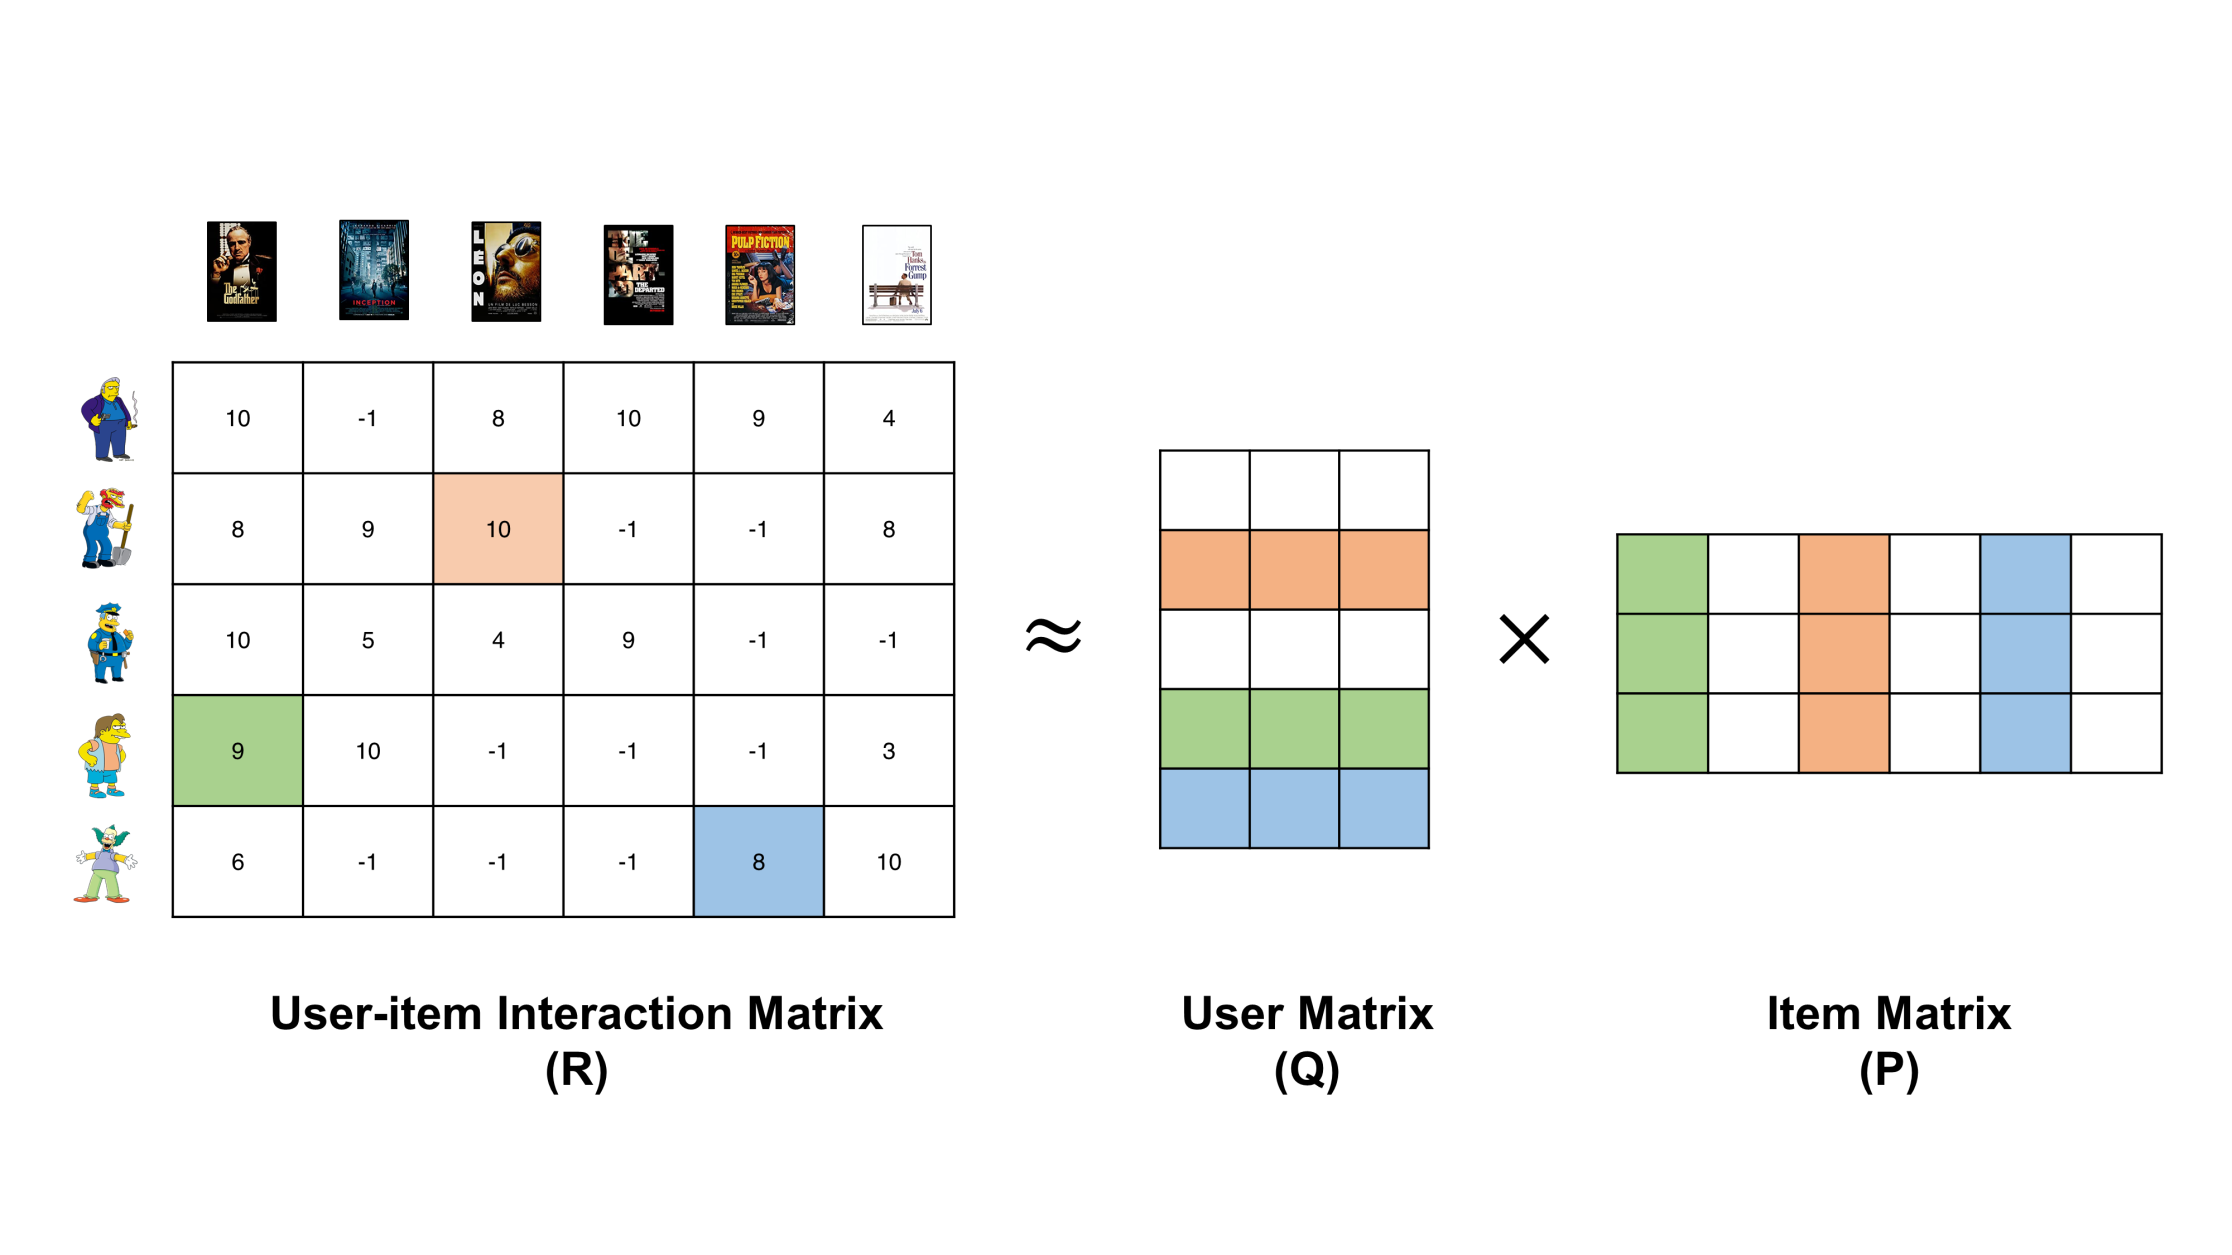

In summary, memory-based methods use direct similarity, while model-based methods (like matrix factorization) learn hidden patterns for more accurate and scalable recommendations.

## The Dataset: MovieLens Explained

We'll work with the [MovieLens](https://grouplens.org/datasets/movielens/) dataset, created by the GroupLens research lab at the University of Minnesota. This dataset is considered the gold standard for recommender system research and education.

### What's in the Dataset?

The `ml-latest-small` dataset contains:
- **100,000+ ratings** from 600+ users on 9,000+ movies
- **Ratings scale**: 0.5 to 5.0 stars (in 0.5 increments)
- **Two main files**:
  - `ratings.csv`: User-movie-rating combinations with timestamps
  - `movies.csv`: Movie information including titles and genres

### The Utility Matrix Concept

At the heart of collaborative filtering is the **utility matrix** - a large table where:
- Rows represent users
- Columns represent movies
- Cells contain ratings (when available)

Here's a simplified example:

|        | Toy Story | Titanic | The Matrix | Shrek |
|--------|-----------|---------|------------|-------|
| User 1 |    4.5    |         |     5.0    |       |
| User 2 |           |   3.0   |            |  4.0  |
| User 3 |    3.5    |   4.5   |     2.0    |       |
| User 4 |           |         |     4.5    |  3.5  |

**Key Challenge**: This matrix is extremely sparse (mostly empty) because users only rate a small fraction of available movies. Our job is to fill in the blanks intelligently.

In [2]:
%pip install scikit-surprise pandas numpy matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [45 lines of output]
      Compiling surprise/similarities.pyx because it changed.
      Compiling surprise/prediction_algorithms/matrix_factorization.pyx because it changed.
      Compiling surprise/prediction_algorithms/optimize_baselines.pyx because it changed.
      Compiling surprise/prediction_algorithms/slope_one.pyx because it changed.
      Compiling surprise/prediction_algorithms/co_clustering.pyx because it changed.
      [1/5] Cythonizing surprise/prediction_algorithms/co_clustering.pyx
      
      Error compiling Cython file:
      ------------------------------------------------------------
      ...
              self.avg_cltr_i = avg_cltr_i
              self.avg_cocltr = avg_cocltr
      
              return self
      
          def compute_averages(self, np.ndarray[np.int_t] cltr_u,
                                                   ^
  

In [3]:
# Create a new environment with Python 3.12
py -3.12 -m venv surprise_env
# Activate it
surprise_env\Scripts\activate
# Install packages
pip install scikit-surprise pandas numpy matplotlib seaborn


SyntaxError: invalid syntax (2969844798.py, line 2)

In [4]:
# Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from surprise import Dataset, Reader, SVD, KNNBasic
from surprise.model_selection import cross_validate, train_test_split

ModuleNotFoundError: No module named 'surprise'

## Data Exploration and Understanding

Let's explore our dataset to understand its characteristics better.

In [6]:
# Load MovieLens data
ratings = pd.read_csv('./ml-latest-small/ratings.csv')
movies = pd.read_csv('./ml-latest-small/movies.csv')

print('Ratings dataset shape:', ratings.shape)
print('Movies dataset shape:', movies.shape)
print('\nFirst few ratings:')
display(ratings.head())

print('\nFirst few movies:')
display(movies.head())

Ratings dataset shape: (100836, 4)
Movies dataset shape: (9742, 3)

First few ratings:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931



First few movies:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
# Let's get some basic statistics about our data
print("=== DATASET STATISTICS ===")
print(f"Number of unique users: {ratings['userId'].nunique():,}")
print(f"Number of unique movies: {ratings['movieId'].nunique():,}")
print(f"Total number of ratings: {len(ratings):,}")
print(f"Rating scale: {ratings['rating'].min()} to {ratings['rating'].max()}")
print(f"Average rating: {ratings['rating'].mean():.2f}")

# Calculate sparsity
total_possible_ratings = ratings['userId'].nunique() * ratings['movieId'].nunique()
sparsity = (1 - len(ratings) / total_possible_ratings) * 100
print(f"Matrix sparsity: {sparsity:.2f}% (most entries are empty)")

=== DATASET STATISTICS ===
Number of unique users: 610
Number of unique movies: 9,724
Total number of ratings: 100,836
Rating scale: 0.5 to 5.0
Average rating: 3.50
Matrix sparsity: 98.30% (most entries are empty)


### Understanding the Sparsity Problem

The sparsity percentage above shows us why recommender systems are challenging. In our matrix of users × movies, most cells are empty because:
- Users typically rate only a small fraction of available movies
- New movies have few ratings initially
- Some users are very active, others rate very few items

This sparsity is actually realistic and reflects real-world scenarios where recommendation systems operate.

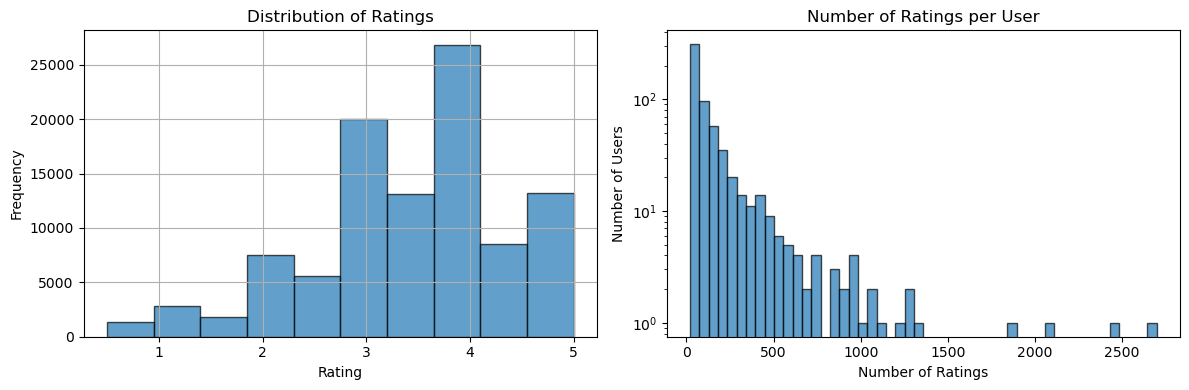

Most active user rated 2698 movies
Least active user rated 20 movies
Average ratings per user: 165.3


In [11]:
# Visualize the rating distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
ratings['rating'].hist(bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
ratings_per_user = ratings.groupby('userId').size()
plt.hist(ratings_per_user, bins=50, edgecolor='black', alpha=0.7)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.yscale('log')

plt.tight_layout()
plt.show()

print(f"Most active user rated {ratings_per_user.max()} movies")
print(f"Least active user rated {ratings_per_user.min()} movies")
print(f"Average ratings per user: {ratings_per_user.mean():.1f}")

In [12]:
# Drop timestamp for modeling
ratings = ratings.drop(columns=['timestamp'])

## Preparing Data for Surprise

The [Surprise](https://surprise.readthedocs.io/) library expects data in a specific format: user, item, rating. Let's convert our DataFrame.

In [13]:
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()
print('Number of users:', trainset.n_users)
print('Number of movies:', trainset.n_items)

Number of users: 610
Number of movies: 9724


``trainset = data.build_full_trainset()`` is a command from the Surprise library that converts your entire ratings DataFrame into a special internal format used for training recommendation models.

- ``data`` is your Surprise Dataset object, created from your ratings DataFrame.
- ``.build_full_trainset()`` takes all the user-movie-rating data and builds a "trainset" object.
- This trainset is optimized for Surprise algorithms: it encodes user and item IDs as integers, stores the ratings, and provides methods for model training.

## Collaborative Filtering: KNN and SVD

We'll try two popular collaborative filtering methods:
- **KNN (k-nearest neighbors)**: Finds users or movies that are similar
- **SVD (Singular Value Decomposition)**: Finds hidden patterns ("tastes")

We'll use RMSE (Root Mean Squared Error) to measure how well our models predict ratings. Lower is better!

### What Happens When We Model with KNN and SVD?

#### KNN (k-Nearest Neighbors)
- **How it works:**
  - Finds either similar users (user-based) or similar items (item-based) using a similarity metric (like cosine similarity).
  - Predicts a user's rating for a movie by averaging the ratings from the most similar users/items.
- **Intuition:**
  - Like asking your closest friends for movie recommendations because you have similar tastes.
- **Visual Example:**
 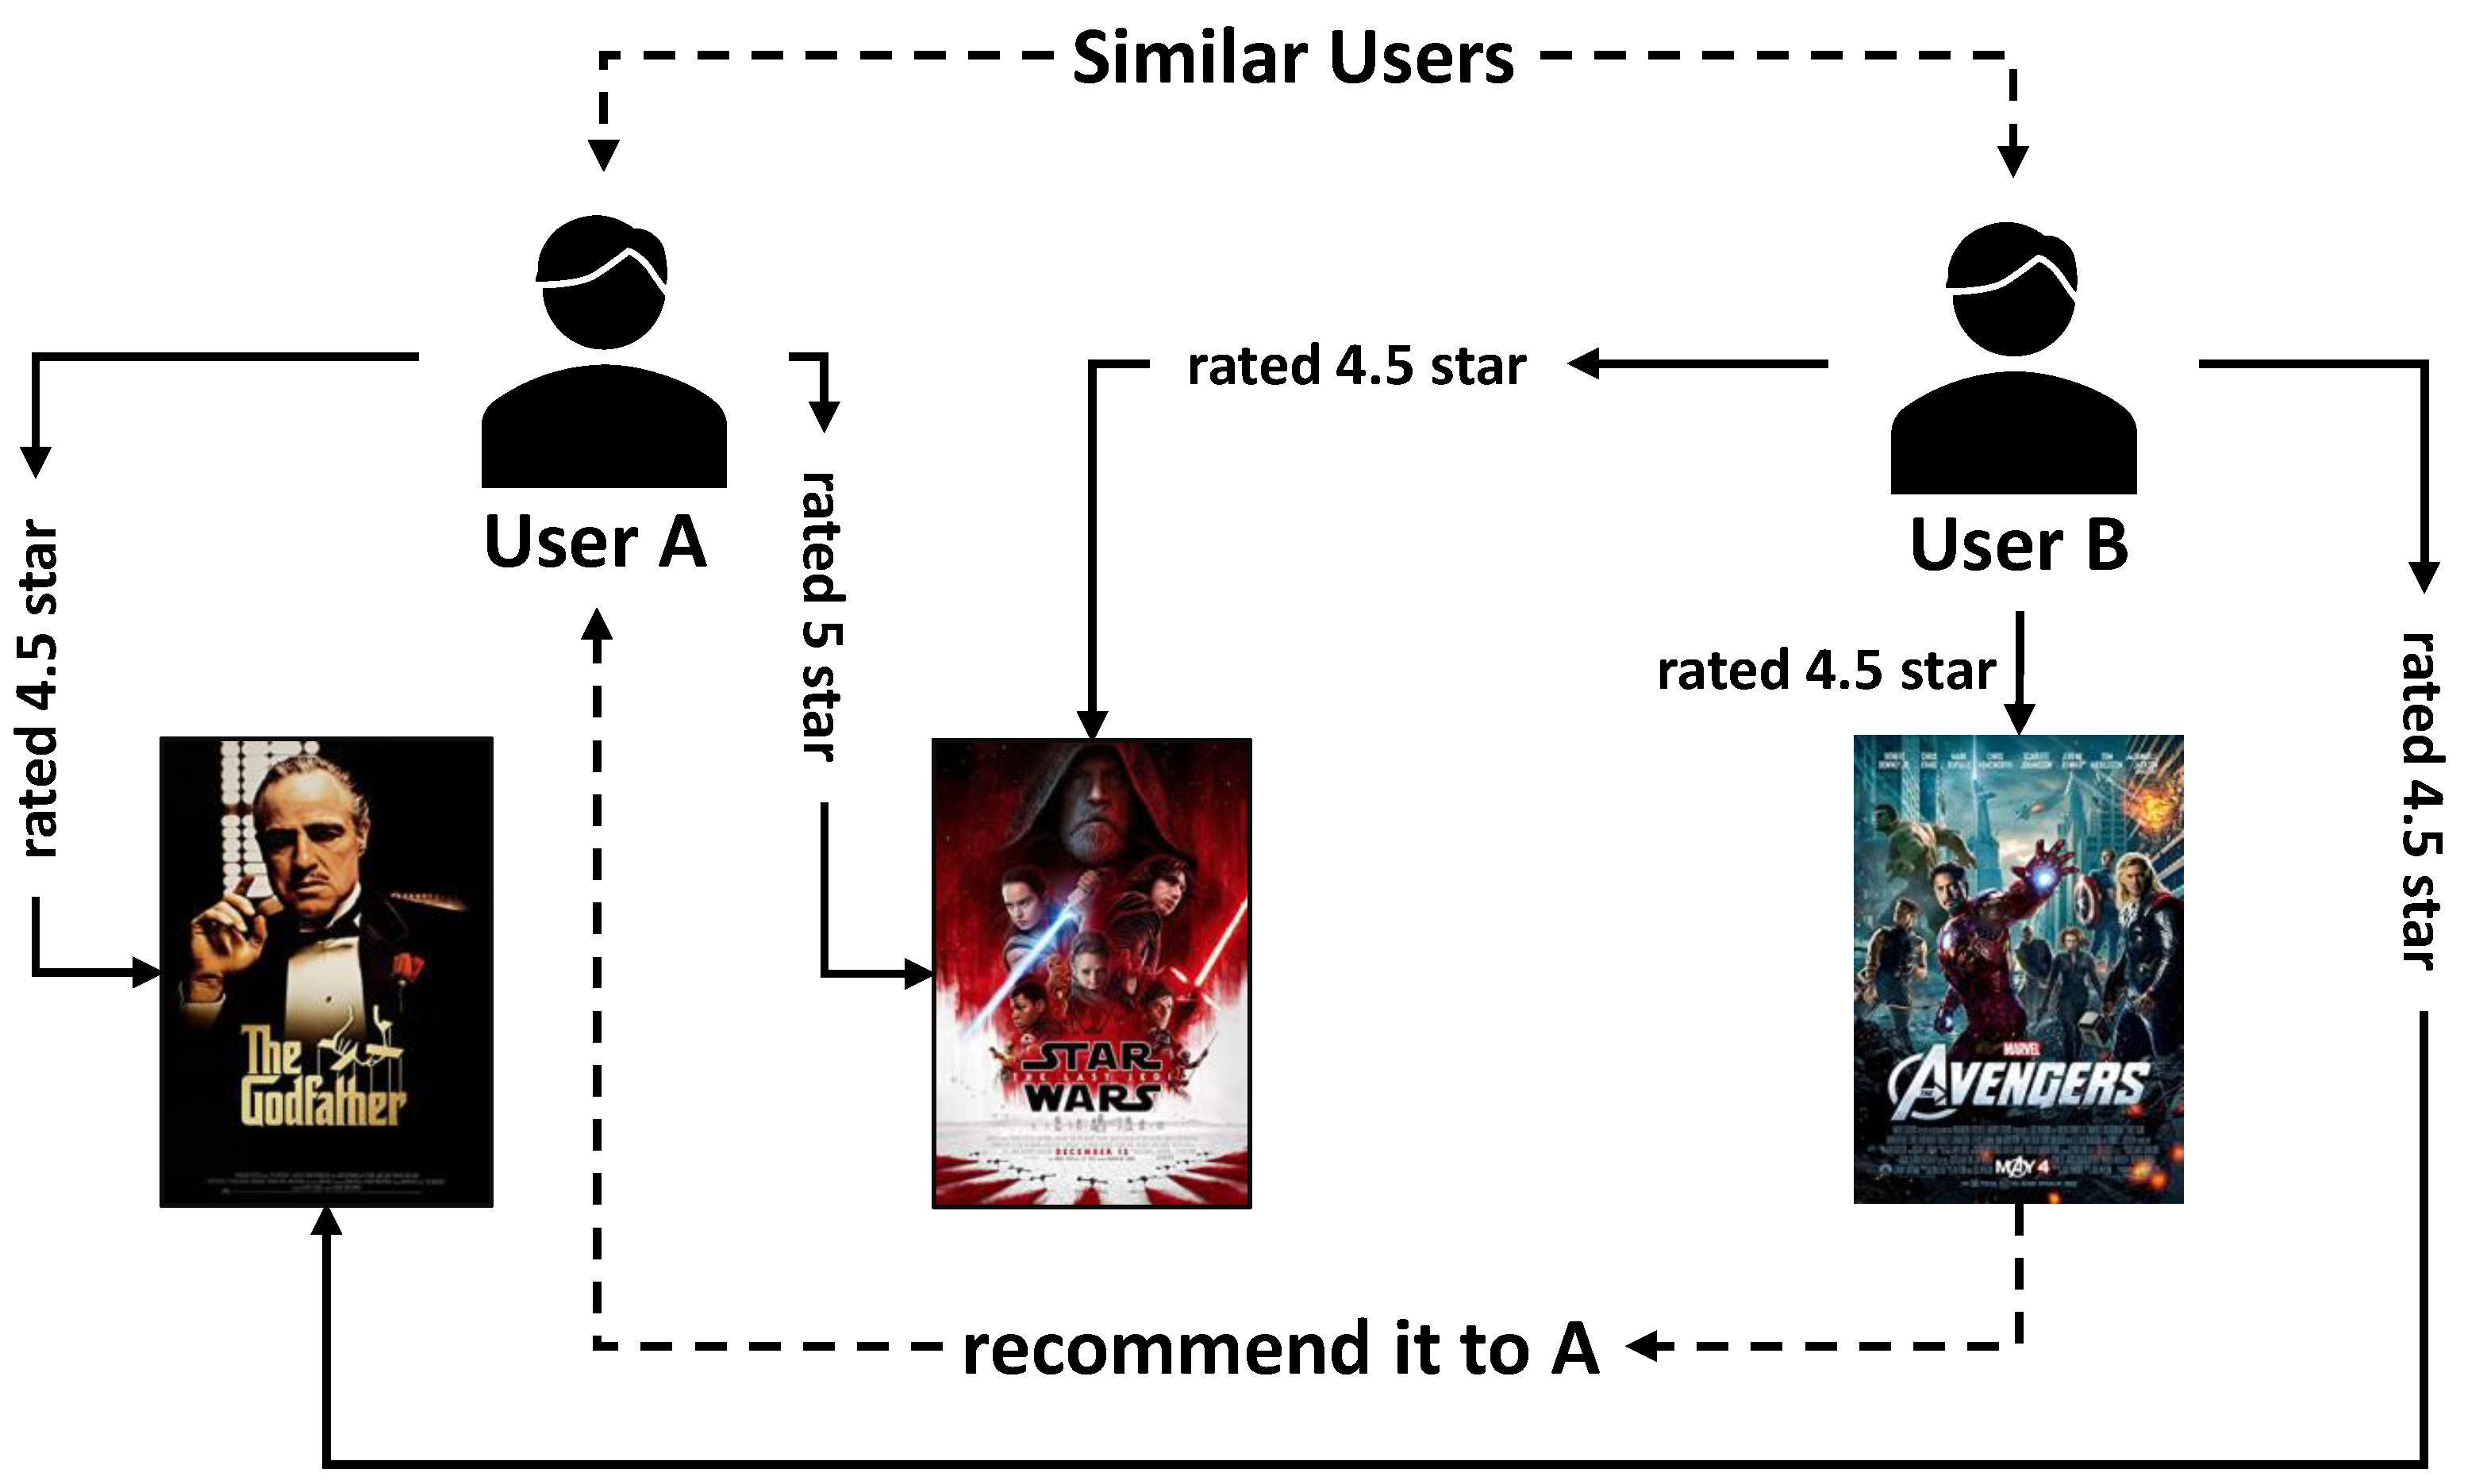
- **Pros:** Simple, interpretable, works well with enough data.
- **Cons:** Slow for large datasets, struggles with sparse data and new users/items.

#### SVD (Singular Value Decomposition)
- **How it works:**
  - Decomposes the user-movie ratings matrix into hidden "latent factors" that capture patterns in user preferences and movie characteristics.
  - Each user and movie is represented by a vector in a lower-dimensional space; their dot product predicts the rating.
- **Intuition:**
  - Like discovering hidden "tastes" (e.g., love for action, comedy, or drama) that explain why users like certain movies.
- **Visual Example:**
  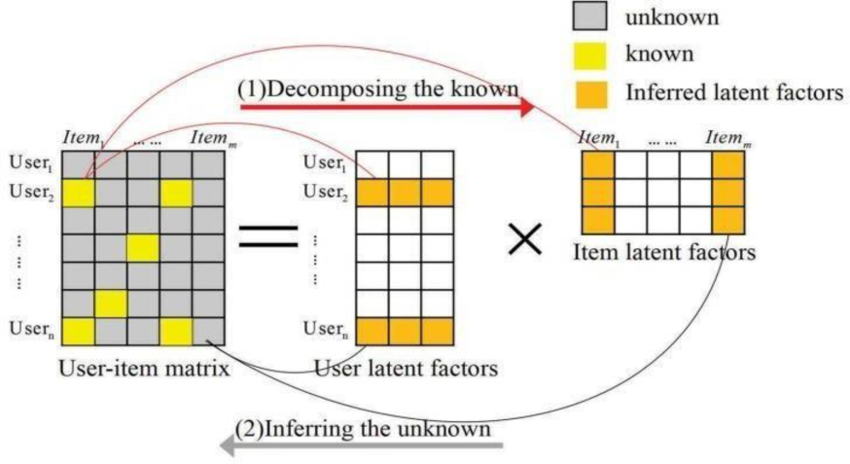
- **Pros:** Handles sparsity well, scalable, uncovers hidden patterns.
- **Cons:** Harder to interpret, needs more computation to train.

Both methods aim to fill in the missing entries in the user-movie matrix, but SVD is generally more powerful for large, sparse datasets.

In [14]:
# KNN model (user-based)
knn = KNNBasic(sim_options={'name': 'cosine', 'user_based': True})
cv_knn = cross_validate(knn, data, measures=['RMSE'], cv=3, verbose=False)
print('KNN RMSE:', np.mean(cv_knn['test_rmse']))

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
KNN RMSE: 0.9802376933841699
KNN RMSE: 0.9802376933841699


``knn = KNNBasic(sim_options={'name': 'cosine', 'user_based': True})`` creates a K-Nearest Neighbors (KNN) collaborative filtering model using the Surprise library.

- ``KNNBasic`` is an algorithm that finds similar users or items based on their ratings.
- ``sim_options={'name': 'cosine', 'user_based': True}`` sets the similarity metric and mode:
-   ``'name': 'cosine'`` means it uses cosine similarity to measure how similar users are.
-   ``'user_based': True`` means it will find similar users (user-based collaborative filtering), not similar items.

``cv_knn = cross_validate(knn, data, measures=['RMSE'], cv=3, verbose=False)`` evaluates the KNN model using cross-validation.

- ``cross_validate`` is a function from the Surprise library that tests your model’s performance.
- ``knn`` is your KNN model.
- ``data`` is your dataset.
- ``measures=['RMSE']`` tells it to calculate the Root Mean Squared Error (RMSE), a common metric for prediction accuracy (lower is better).
- ``cv=3`` means it splits the data into 3 folds (runs the test 3 times, each time with a different part as the test set).
- ``verbose=False`` means it won’t print progress details.

In [15]:
# SVD model
svd = SVD(n_factors=50, reg_all=0.05, random_state=42)
cv_svd = cross_validate(svd, data, measures=['RMSE'], cv=3, verbose=False)
print('SVD RMSE:', np.mean(cv_svd['test_rmse']))

SVD RMSE: 0.8739323219278633


``svd = SVD(n_factors=50, reg_all=0.05, random_state=42)``
This creates an SVD (Singular Value Decomposition) model for collaborative filtering using the Surprise library.

- n_factors=50 sets the number of hidden “latent features” (patterns or tastes) the model will learn.
- reg_all=0.05 controls regularization, which helps prevent overfitting.
- random_state=42 ensures reproducible results.

``cv_svd = cross_validate(svd, data, measures=['RMSE'], cv=3, verbose=False)``
- This evaluates the SVD model using 3-fold cross-validation and calculates the RMSE (Root Mean Squared Error) for each fold.

``print('SVD RMSE:', np.mean(cv_svd['test_rmse']))``
- This prints the average RMSE across all folds, showing how well the SVD model predicts ratings (lower is better).

### Analogy: SVD as "Movie DNA"

SVD breaks down the giant ratings matrix into hidden "tastes" (like DNA for movies and users). If you and a movie share similar DNA, you'll probably like it!


## Making Recommendations

Let's use our SVD model to recommend movies for a user. We'll:
1. Find all movies the user hasn't rated
2. Predict ratings for those movies
3. Show the top N recommendations

In [16]:
# Fit SVD on all data
svd.fit(trainset)

# Pick a user
user_id = 1
# Movies the user hasn't rated
user_rated = set(ratings[ratings['userId'] == user_id]['movieId'])
all_movies = set(movies['movieId'])
not_rated = list(all_movies - user_rated)

# Predict ratings for unseen movies
preds = [svd.predict(user_id, iid) for iid in not_rated]
preds_sorted = sorted(preds, key=lambda x: x.est, reverse=True)

# Show top 5 recommendations
rec_ids = [int(p.iid) for p in preds_sorted[:5]]
movies[movies['movieId'].isin(rec_ids)][['title', 'genres']]

,title,genres
277,"Shawshank Redemption, The (1994)",Crime|Drama
602,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War
659,"Godfather, The (1972)",Crime|Drama
686,Rear Window (1954),Mystery|Thriller
694,Casablanca (1942),Drama|Romance


``svd.fit(trainset)``
- Trains the SVD model on all available user-movie ratings.

``user_id = 1``
- Selects a specific user (user with ID 1) to make recommendations for.

``user_rated = set(ratings[ratings['userId'] == user_id]['movieId'])``
- Finds all movies that this user has already rated.

``all_movies = set(movies['movieId'])``
- Gets the set of all movie IDs in the dataset.

``not_rated = list(all_movies - user_rated)``
- Finds the movies the user has NOT rated yet (potential candidates for recommendation).

``preds = [svd.predict(user_id, iid) for iid in not_rated]``
- Uses the trained SVD model to predict how much the user would like each unseen movie.

``preds_sorted = sorted(preds, key=lambda x: x.est, reverse=True)``
- Sorts the predictions from highest to lowest estimated rating.

``rec_ids = [int(p.iid) for p in preds_sorted[:5]]``
- Gets the IDs of the top 5 movies with the highest predicted ratings.

``movies[movies['movieId'].isin(rec_ids)][['title', 'genres']]``
- Looks up and displays the titles and genres of the top 5 recommended movies for the user.

## Cold Start: Recommending for a New User
The cold start problem in recommender systems refers to the challenge of making accurate recommendations for new users or new items that have little or no interaction data.

- For new users: The system doesn’t know their preferences because they haven’t rated or interacted with any items yet.
- For new items: The system can’t recommend them effectively because no users have rated or interacted with them.
This problem is common in collaborative filtering approaches, which rely on historical user-item interactions. Solutions include asking new users to rate a few items during onboarding, using demographic or content information, or recommending popular items until more data is available.

Suppose a new user rates a few movies. Can we recommend more? Let's simulate this!

In [17]:
# Simulate new user
new_user_id = ratings['userId'].max() + 1
# Pick 3 popular movies to rate
popular = ratings['movieId'].value_counts().index[:3]
new_ratings = pd.DataFrame({
    'userId': [new_user_id]*3,
    'movieId': popular,
    'rating': [5.0, 4.5, 4.0]
})

# Add to ratings and retrain
augmented = pd.concat([ratings, new_ratings], ignore_index=True)
data_aug = Dataset.load_from_df(augmented[['userId', 'movieId', 'rating']], reader)
train_aug = data_aug.build_full_trainset()
svd.fit(train_aug)

# Recommend for new user
user_rated = set(new_ratings['movieId'])
not_rated = list(all_movies - user_rated)
preds = [svd.predict(new_user_id, iid) for iid in not_rated]
preds_sorted = sorted(preds, key=lambda x: x.est, reverse=True)
rec_ids = [int(p.iid) for p in preds_sorted[:5]]
movies[movies['movieId'].isin(rec_ids)][['title', 'genres']]

,title,genres
680,"Philadelphia Story, The (1940)",Comedy|Drama|Romance
841,"Streetcar Named Desire, A (1951)",Drama
899,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance
906,Lawrence of Arabia (1962),Adventure|Drama|War
2226,Fight Club (1999),Action|Crime|Drama|Thriller


``new_user_id = ratings['userId'].max() + 1``
- Creates a new user by assigning an ID one higher than the current maximum.

``popular = ratings['movieId'].value_counts().index[:3]``
- Finds the 3 most popular movies (those with the most ratings).

``new_ratings = pd.DataFrame({...})``
- Simulates the new user rating these 3 popular movies with high scores (5.0, 4.5, 4.0).

``augmented = pd.concat([ratings, new_ratings], ignore_index=True)``
- Adds the new user’s ratings to the existing ratings DataFrame.

``data_aug = Dataset.load_from_df(augmented[['userId', 'movieId', 'rating']], reader)``
- Converts the updated ratings into the Surprise dataset format.

``train_aug = data_aug.build_full_trainset()``
- Prepares the full training set including the new user.

``svd.fit(train_aug)``
- Retrains the SVD model on the updated data (including the new user).

``user_rated = set(new_ratings['movieId'])``
- Gets the set of movies the new user has already rated.

``not_rated = list(all_movies - user_rated)``
- Finds movies the new user hasn’t rated yet.

``preds = [svd.predict(new_user_id, iid) for iid in not_rated]``
- Predicts ratings for all unseen movies for the new user.

``preds_sorted = sorted(preds, key=lambda x: x.est, reverse=True)``
- Sorts the predictions from highest to lowest estimated rating.

``rec_ids = [int(p.iid) for p in preds_sorted[:5]]``
- Gets the IDs of the top 5 recommended movies.

``movies[movies['movieId'].isin(rec_ids)][['title', 'genres']]``
- Displays the titles and genres of the top 5 recommended movies for the new user.

## Summary & Next Steps

- You learned what recommender systems are and why they're useful
- You built and evaluated collaborative filtering models
- You made movie recommendations for real and new users

**Next:** Try tuning model parameters, filtering by genre, or building a simple web app for recommendations!

**References:**
- [Surprise Documentation](https://surprise.readthedocs.io/)
- [MovieLens Datasets](https://grouplens.org/datasets/movielens/)